In [37]:
#Install Matplotlib (For CI Success) - Have to install Locally
%pip install matplotlib

In [38]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [40]:
#Install Seaborn (For CI Success) - Have to install Locally
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [41]:
#importing libraries and creating a data frame of the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [42]:
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

In [43]:
df = pd.read_csv('../googleplaystore_clean.csv')
reviews_df = pd.read_csv('../googleplaystore_user_reviews.csv')


In [44]:
merged_df = pd.merge(df, reviews_df, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [45]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()

In [46]:
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

In [47]:
new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])

In [48]:
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y

In [49]:
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)

In [50]:
trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[::3][6:-5],
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]

layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})


# Health and Fitness apps perform the best, having more than 85% positive reviews.
# On the contrary, many Game and Social apps perform bad leading to 50% positive and 50% negative.

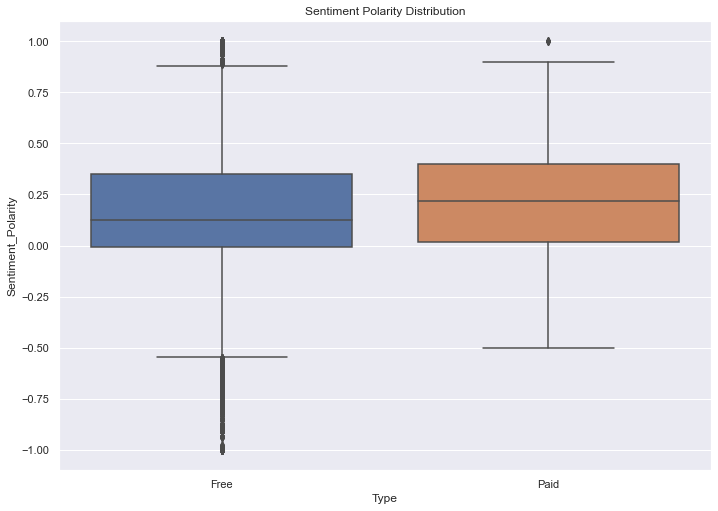

In [51]:
# Free apps receive a lot of harsh comments which are indicated as outliers on the negative Y-axis.
# Users are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app.

sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')